In [50]:
import pandas as pd
data = pd.read_csv('svg_test_q.csv')
start = data.columns[0]
T = [start]
T = T + list(data[data[start].str.startswith("Mon")][start])
Time = [t.split()[3] for t in T]
# keys_ = ['TIME']+list(set(list(data[data[start].str.startswith('SVG')][start])))

data_dict = []
j=0
for i in range(len(Time)):
    data_dict.append({'TIME':Time[i],'SVG_1:Q_COM_F':int(data.iloc[j+1,0]),'SVG_1:Q':int(data.iloc[j+3,0]),
                      'SVG_2:Q_COM_F':int(data.iloc[j+5,0]),'SVG_2:Q':int(data.iloc[j+7,0])})
    j=j+9

feedbacks = pd.DataFrame(data_dict)
# feedbacks.set_index('TIME',inplace=True)
feedbacks.to_csv('svg_test_q_fixed.csv')
feedbacks['TIME']=pd.to_datetime(feedbacks['TIME'],format='%H:%M:%S').dt.time

In [52]:
import pandas as pd
data = pd.read_csv('sakaka_svg_history.csv',header=None)
E =list(data[0].str.split())
data_dict_1=[]
data_dict_2=[]
for e in E:
    try:
        Setpoint = int(e[-1])
        Time = e[2]
        id = -2
        if e[-2]=="--":
            id = -3
        if e[id][-1]=='0':
            SVG="SVG1"
        else:
            SVG="SVG2"
        if SVG=="SVG1":
            data_dict_1.append({"TIME":Time,"Setpoint":Setpoint,"SVG":SVG})
        else:
            
            data_dict_2.append({"TIME":Time,"Setpoint":Setpoint,"SVG":SVG})
    except:
        pass
commands_svg1=pd.DataFrame(data_dict_1)
commands_svg2=pd.DataFrame(data_dict_2)
commands_svg1['TIME']=pd.to_datetime(commands_svg1['TIME'],format='%H:%M:%S').dt.time
commands_svg2['TIME']=pd.to_datetime(commands_svg2['TIME'],format='%H:%M:%S').dt.time

# data_fixed.to_csv('sakaka_svg_history_fixed.csv')

In [53]:
data = pd.read_csv("svg_test.csv")
data['TIME']=pd.to_datetime(data['TIME'],format='%H:%M:%S').dt.time

<IPython.core.display.Javascript object>


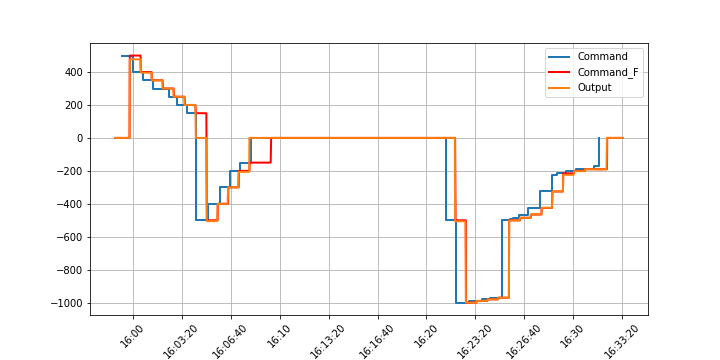

In [54]:
import matplotlib.pyplot as plt
%matplotlib notebook
# plt.figure(figsize=(12,5))
from matplotlib.figure import Figure

fig = plt.figure(figsize=(10,5))
plt.subplot(111)
ax=plt.gca()
ax.step(commands_svg1['TIME'],commands_svg1['Setpoint'],where='post',label='Command',linewidth=2)
ax.plot(feedbacks['TIME'],feedbacks['SVG_1:Q_COM_F'],"r",label='Command_F',linewidth=2)
ax.plot(feedbacks['TIME'],feedbacks['SVG_1:Q'],label='Output',linewidth=2)
x = plt.gca().xaxis
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.grid()
plt.show()
plt.legend()
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

<IPython.core.display.Javascript object>


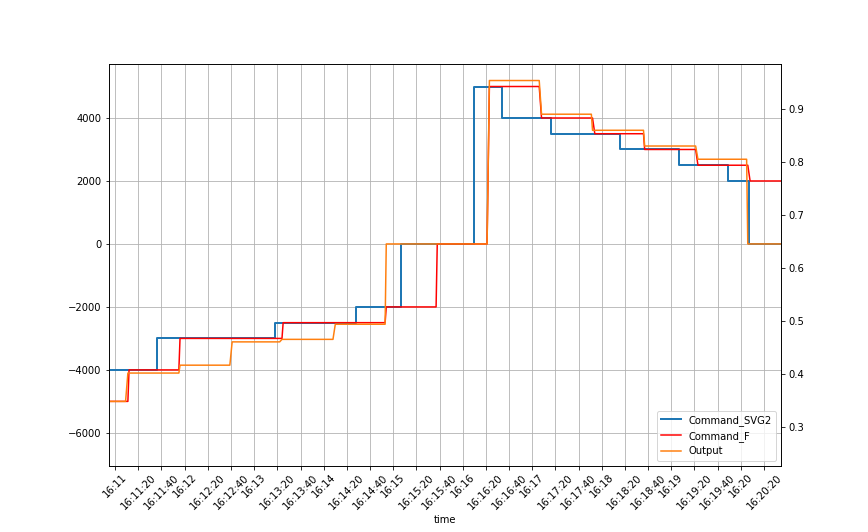

In [66]:
fig = plt.figure(figsize=(10,5))
plt.subplot(111)
ax=plt.gca()
l1=ax.step(commands_svg2['TIME'],-commands_svg2['Setpoint']*10,where='post',label='Command_SVG2',linewidth=2)
l2=ax.plot(feedbacks['TIME'],-feedbacks['SVG_2:Q_COM_F']*10,"r",label='Command_F')
l3=ax.plot(feedbacks['TIME'],-feedbacks['SVG_2:Q']*10,label='Output')
ax2 =ax.twinx()
# l4=ax2.plot(data['TIME'],data['ppc:Q0'],"r",label="Q@POI",linewidth=2)
x = ax.xaxis
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.grid()

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs,loc='lower right')

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
plt.savefig('test.png',facecolor='w', edgecolor='none',bbox_inches='tight')

<IPython.core.display.Javascript object>


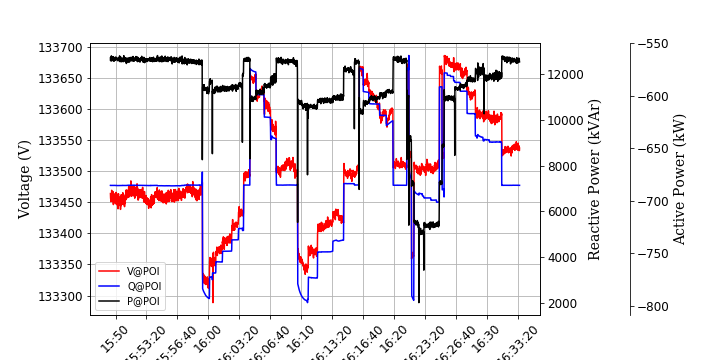

In [28]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
        
fig,ax1 = plt.subplots(figsize=(10,5))
fig.subplots_adjust(right=0.75)

l1 = ax1.plot(data['TIME'],data['ppc:V0'],"r",label='V@POI')

ax2 = ax1.twinx()
l2 = ax2.plot(data['TIME'],data['ppc:Q0'],"b",label='Q@POI')

ax3= ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(ax3)
ax3.spines["right"].set_visible(True)

l3 = ax3.plot(data['TIME'],data['ppc:P0'],"k",label='P@POI')

x = ax1.xaxis
y1= ax1.yaxis
y2= ax2.yaxis
y3= ax3.yaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
    item.set_fontsize(12)

for item in y1.get_ticklabels():
    item.set_fontsize(12)
    
for item in y2.get_ticklabels():
    item.set_fontsize(12)

for item in y3.get_ticklabels():
    item.set_fontsize(12)
    
# added these three lines
lns = l1+l2+l3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs,loc='lower left')

ax1.xaxis.set_major_locator(plt.MaxNLocator(15))
ax1.grid()

_=ax1.yaxis.set_label_text("Voltage (V)",fontdict=font)
_=ax2.yaxis.set_label_text("Reactive Power (kVAr)",fontdict=font)
_=ax3.yaxis.set_label_text("Active Power (kW)",fontdict=font)
_=ax1.xaxis.set_label_text("Time",fontdict=font)

# plt.show()

In [66]:
def parse_csv(csv):
    try:
        data = pd.read_csv(csv,delimiter=" ")
        print("The following entries have been found:")
        for e in list(data.columns):
            print(e)
    except FileNotFoundError:
        print("CSV NOT FOUND")

In [68]:
data=pd.read_csv('Cafayate/cafayate.csv',delimiter=" ")
entries= list(data.columns) 

In [72]:
import re
pattern='apc:PSP0.*'
for e in entries:
    if re.match(pattern,e):
        print(e)

apc:PSP0_eff


In [70]:
entries

['TIME',
 'ppc:P0',
 'ppc:F',
 'ppc:Q0',
 'ppc:V0',
 'ppc:PF',
 'apc:En',
 'apc:FCEn',
 'rpc:En',
 'rpc:VCEn',
 'pfc:En',
 'apc:PSP0_eff',
 'apc:FSP',
 'rpc:QSP0_eff',
 'rpc:VSP0',
 'pfc:PFSP',
 'apc:PID_Status',
 'rpc:PID_Status',
 'ppc:CSel',
 'apc:CSelOvr_S',
 'rpc:CSelOvr_S',
 'apc:FSrc',
 'apc:FODroop']